# 확률
- 미래에 발생할 사건에 대한 믿음에 댛한 측정값
- 현상의 측정값을 불확실성에 의해 예측할 수 없는 경우에 사용

## 빈도론적 확률
- 우리한테 일반적으로 잘 알려져 있는 확률(고전 확률)
- 어떤 사건을 반복해서 관찰 및 수집했을 때, 발생하는 상대 빈도수를 확률로 정의
- 시행을 한 번도 안했거나, 한 번뿐인 사건은 정의가 되지 않음
- 수집된 자료들의 변수들도, 확률적으로 주어지는 값으로 해석

## Laplace 확률
- 고전적 확률에 대한 정의
- 표본공간의 각 원소들이 일어날 가능성이 같다고 가정하여 확률을 정의
- 일반적으로 표본공간의 개수가 유한하고, 원소 모두를 알고 있을 때, 사용할 수 있다

## 확률의 공리
- 확률의 단순한 정의
- 확률은 항상 0보다 크거나 같고, 1보다 작거나 같다
- 전체사건 S에 대해서, 각각의 사건들이 상호배반적이라면, 각 사건들이 발생하는 확률은 각 확률을 더한것과 같다

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
dice = [1, 2, 3, 4, 5, 6]
prob= [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [3]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 4, 6, 6, 5, 5, 6, 5, 6, 5, 4, 5, 4, 4, 6, 1, 6, 4, 6, 6, 6, 2,
       5, 5, 6, 5, 6, 3, 5, 6, 3, 5, 3, 2, 5, 6, 3, 6, 5, 3, 4, 6, 5, 2,
       5, 4, 6, 5, 1, 1, 4, 2, 5, 2, 6, 6, 6, 5, 4, 6, 6, 2, 3, 6, 5, 6,
       2, 1, 5, 4, 4, 6, 6, 6, 3, 3, 6, 6, 3, 3, 6, 6, 3, 5, 5, 4, 2, 6,
       5, 5, 6, 6, 4, 6, 4, 5, 6, 5, 5, 6])

In [14]:
freq, _ =np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'빈도수':freq, '상대 빈도수':freq/num_trial}, index=pd.Index(np.arange(1, 7), name='dice'))

,빈도수,상대 빈도수
dice,,
1,4,0.04
2,8,0.08
3,11,0.11
4,14,0.14
5,26,0.26
6,37,0.37


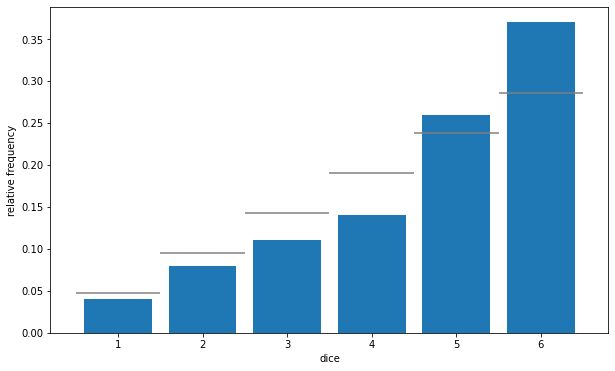

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


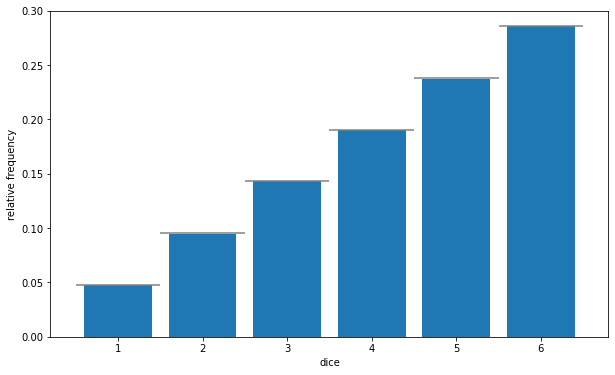

In [28]:
num_trial = 1000000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


In [30]:
df = pd.read_csv('C:/Users/BAUM/Desktop/multicampus/TIL/기본강의/누구나파이썬통계분석/data/python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]


array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

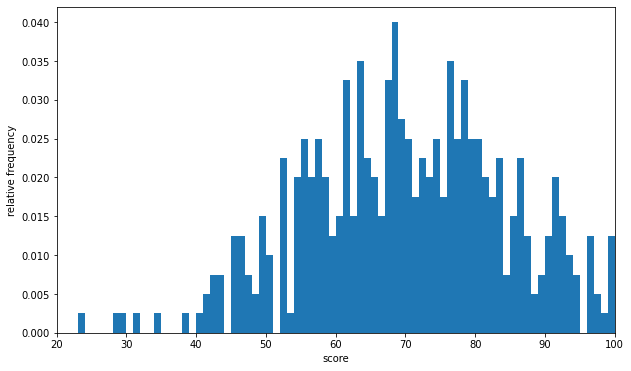

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


In [32]:
np.random.choice(scores)


72

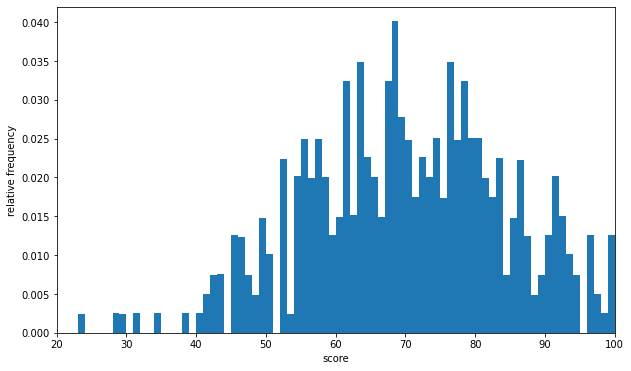

In [34]:
sample = np.random.choice(scores, 1000000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


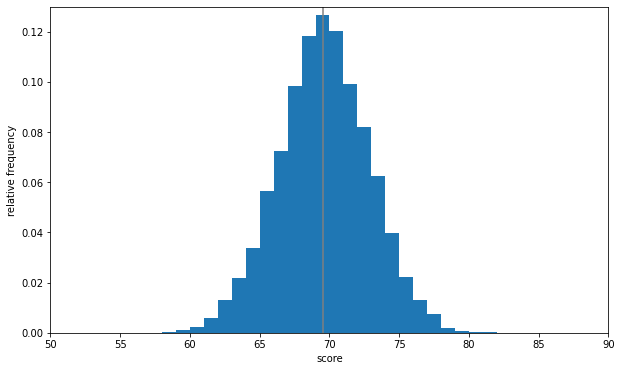

In [35]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


## 확률분포
- 확률변수가 특정한 값을 가지게 될 확률을 나타내는 함수
- 현실세계의 자료는 확률분포를 알 수 없는 경우가 더 많기 때문에, 일반적으로 잘 알려진 확률분포를 가정

## 이산확률변수
- 확률변수가 이산적인 값을 가질때, 이 변수를 이산확률변수라고 함
- 셀수 있는 값이거나 범주형 자료들이 이에 해당
- 베르누이 분포, 이항 분포 등

## 이산확률분포
- 베르누이 분포
- 가능한 사건의 경우가 두 가지로 구분되는 시행
- 베르누이 시행은 0(실패), 1(성공)으로 간단히 표현

In [37]:
from scipy.stats import bernoulli, binom, poisson

- 주사위를 던졌을 때, 특정 눈금이 나오는 경우를 성공이라고 가정
- 1이 나오는 경우를 성공이라고 가정
- 성공확률이 1/6인 베르누이 분포를 따름
- 표본의 자료가 베르누이 분포를 따른다면, 모집단에서의 성공확률을 알 수있음

In [38]:
rv = bernoulli(1/6)

In [40]:
x = [0, 1]
rv.pmf(x)

array([0.83333333, 0.16666667])

([<matplotlib.axis.XTick at 0x1731b568b20>,
 [Text(0, 0, 'fail'), Text(1, 0, 'success')])

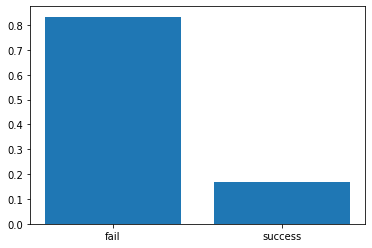

In [41]:
plt.bar(x, rv.pmf(x))
plt.xticks([0, 1], ['fail', 'success'])

In [43]:
count = 100
x = rv.rvs(count)
x

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [44]:
import seaborn as sns

C:\Users\BAUM\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

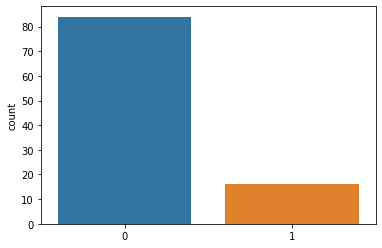

In [45]:
sns.countplot(x)

In [46]:
np.bincount(x) / count

array([0.84, 0.16])

In [47]:
count = 1000000
x = rv.rvs(count)
x


array([0, 0, 0, ..., 0, 0, 0])

C:\Users\BAUM\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

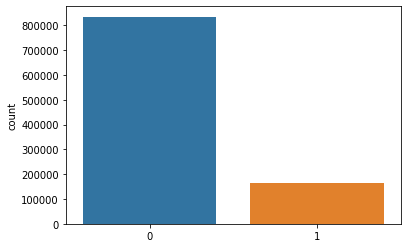

In [48]:
sns.countplot(x)

In [49]:
np.bincount(x) / count

array([0.834198, 0.165802])

In [50]:
rv = binom(1, 1/6).pmf([0, 1])

In [51]:
rv

array([0.83333333, 0.16666667])

In [52]:
rv = binom(10, 1/6)


<BarContainer object of 11 artists>

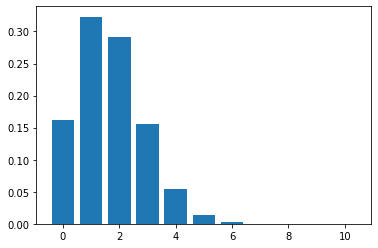

In [53]:
x = np.arange(11)
rv.pmf(x)
plt.bar(x, rv.pmf(x))

In [58]:
x = rv.rvs(1000000)

C:\Users\BAUM\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

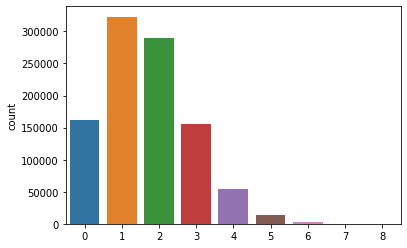

In [59]:
sns.countplot(x)

## 누적 분포 함수
- 주어진 확률변수가 특정값보다 크거나 작아질 확률
- 누적분포함수는 항상 0과 1사이의 값을 가지게 됩니다

In [60]:
x = np.arange(11)
rv.cdf(x)

array([0.16150558, 0.48451675, 0.7752268 , 0.93027216, 0.98453803,
       0.99756184, 0.99973248, 0.99998055, 0.99999916, 0.99999998,
       1.        ])

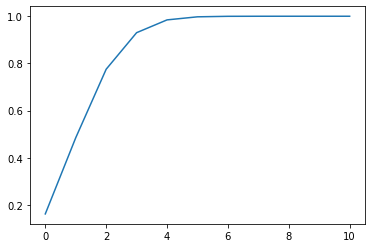

In [62]:
plt.plot(x, rv.cdf(x))

In [63]:
prob = rv.cdf(x)
prob[3]

0.9302721574455114

## 포아송 분포
- 시간이나 면적등을 구간으로 나눠서 표현
- 각 구간별 사건은 독립적이고, 사건의 발생확률은 동일(베르누이와 동일)
- 각 구간의 사건 발생확률은 구간의 크기에 비례
- 정해진 시간안에 어떤 사건이 일어날 횟수에 대한 확률

In [64]:
rv = poisson(2)

In [65]:
x = np.arange(11)

<BarContainer object of 11 artists>

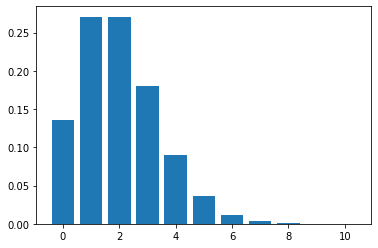

In [66]:
plt.bar(x, rv.pmf(x))

C:\Users\BAUM\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

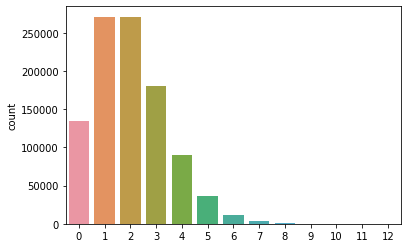

In [67]:
x = rv.rvs(1000000)
sns.countplot(x)

In [68]:
x.mean()

1.999005

## 연속확률변수
- 확률변수가 연속적인 값을 가지는 경우를 말함
- 이때의 확률분포를 확률변수의 확률밀도함수라고 함

## 정규분포
- 통계학자들이 가장 사랑하는 분포
- 가우스에 의해서 처음 알려졌고, 가우스 분포로도 잘 알려져 있음
- 선형회귀모형에서는 자료의 분포, 오차항의 분포를 정규분포로 가정
- 평균이 0 이고 표준편차가 1인 정규분포를 표준정규분포라고 함

In [69]:
from scipy.stats import norm

In [70]:
rv = norm(loc=0, scale=1)

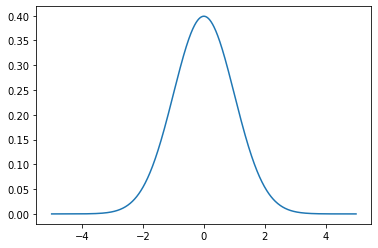

In [71]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, rv.pdf(x))

## 정규분포의 누적분포함수
- 정규분포의 누적분포함수는 구할 수 없음이 알려져 있는데 파이썬은 근사값을 돌려줌
- 일반화선형모형에서 logit함수나 딥러닝에서 활성화 함수 등이 정규분포의 누적분포함수를 사용

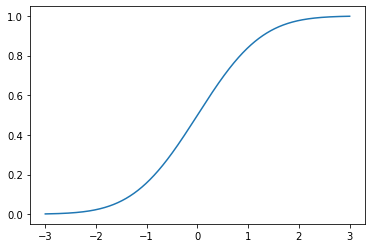

In [72]:
x = np.linspace(-3, 3, 1000)
plt.plot(x, rv.cdf(x))

## 중심극한의 정리
- 물론 증명도 되어 있고, 통계적 뫃형을 세울 때, 정규분포를 사용할 수 있는 중요한 이론
- 모집단의 분포가 무엇이든 어떤것이든 동일하기만 하면 상관없음
- 표본들의 크기가 충분하다면 결국 정규분포로 수렴
- 단, 실제 자료의 분포가 정규분포임을 증명하지는 않음

In [73]:
from scipy.stats import uniform

In [76]:
n = 20
m = 1000000
mean = []

rv = uniform(n)

for _ in range(m):
    x = rv.rvs(n)
    mean.append(x.mean())

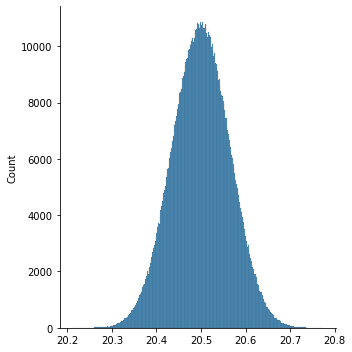

In [77]:
sns.displot(mean)

## 몬테카를로 시뮬레이션
- 난수를 이용해서 시행하는 모의싫험
- 핵무기 연구에 사용
- 아주 많은 연산을 필요로 하는 경우에, 효과적인 알고리즘이 필요
- 난수를 이용해서 해결 방법을 제안

## 도박사의 몰락
- 도박사는 과연 얼마만에 파산을 할 것인가?
- 확률분포를 가정하기 어려움
- 이런 경우, 시뮬레이션을 통해 표본을 추출하고 모집단의 모수를 추정
- 모수 : 모집단의 평균 및 분산 등

## 카지노의 승률
- 카지노마다, 게임마다 승률이 다름
- 일반적으로 승률이 49%를 넘지 않게 설계되어 있음
- 성공확률이 49%인 베르누이 분포를 가정

In [78]:
# 초기자금 10,000원
# 49%의 확률로 100원을 따거나, 51%의 확률로 100원을 잃는 베르누이 분포를 가정
# 도박사는 얼마만에 파산할 것인가? (파산하지 않는 경우는 고려하지 않는다)

n = 10000
p = 0.49
r = []
x = [-100, 100]

while True:
    i = bernoulli(p).rvs(1)[0]
    n += x[i]
    r.append(n)
    if n < 0:
        break

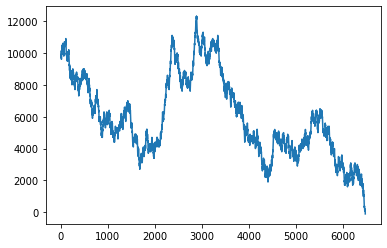

In [79]:
plt.plot(r)

- 도박사가 파산할 때 까지의 게임 횟수를 m 이라고 하자
- 이때 m은 확률변수가 된다
- 평균적으로 몇 회만에 파산하는가?
- 충분한 시뮬레이션을 해보고 그 결과를 확인
- 시간적인 문제로 1000회 정도 몬테카를로 시뮬레이션 시행

In [80]:
p = 0.49
m = []
x = [-100, 100]

for _ in range(1000):
    n = 10000
    cnt = 0
    while True:
        cnt += 1
        i = bernoulli(p).rvs(1)[0]
        n += x[i]
        if n < 0:
            break
    m.append(cnt)

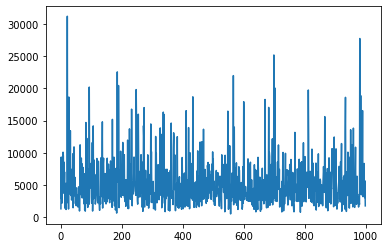

In [81]:
plt.plot(m)

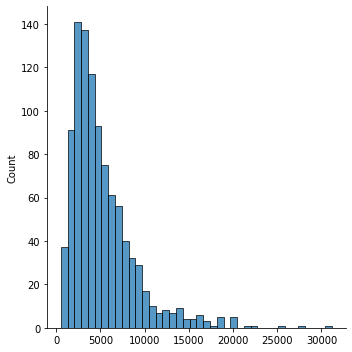

In [83]:
sns.displot(m)
plt.show()

In [92]:
np.mean(m)

5212.114